# 作業
請使用不同的資料集，並使用 hyper-parameter search 的方式，看能不能找出最佳的超參數組合

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import time

from pprint import pprint

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
digits = datasets.load_digits()
print('data.shape: {}, target.shape: {}'.format(digits.data.shape, digits.target.shape))

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0, stratify=digits.target)

data.shape: (1797, 64), target.shape: (1797,)


In [4]:
def tuning_parameters(alg, params, data, target):
    
    grid_search = GridSearchCV(alg, params, error_score=0, cv=10, n_jobs=-1)
    grid_search.fit(data, target)
    
    print(f'Best Accuracy: {grid_search.best_score_:.4f}')
    print(f'\nBest Parameters: {grid_search.best_params_}')
    print(f"\nAverage Time to fit: {grid_search.cv_results_['mean_fit_time'].mean():.4f}")
    print(f"\nAverage Time to predict: {grid_search.cv_results_['mean_score_time'].mean():.4f}")

In [5]:
rfc = RandomForestClassifier(n_jobs=-1)

print('Parameters currently in use:\n')
pprint(rfc.get_params())

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

print(f"\nTesting accuracy = {metrics.accuracy_score(y_test, y_pred):.3f}")

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Testing accuracy = 0.944


In [6]:
model = Pipeline([
    ('rfc', rfc)
])

params = {
    'rfc__criterion': ['gini', 'entropy'],
    'rfc__n_estimators': [30, 40, 50],
    'rfc__max_depth': [20, 30, 40],
    'rfc__min_samples_split': [2, 3, 4],
    'rfc__min_samples_leaf': [1, 2, 3],
}

start_time = time.time()
tuning_parameters(model, params, digits.data, digits.target)
print(f"Time elapsed = {time.time() - start_time} (sec)")

Best Accuracy: 0.9555

Best Parameters: {'rfc__criterion': 'gini', 'rfc__max_depth': 20, 'rfc__min_samples_leaf': 2, 'rfc__min_samples_split': 2, 'rfc__n_estimators': 50}

Average Time to fit: 0.1907

Average Time to predict: 0.1177
Time elapsed = 91.08195352554321 (sec)


In [22]:
rfc = RandomForestClassifier(criterion='gini',
                             max_depth=20,
                             min_samples_leaf=2,
                             min_samples_split=2,
                             n_estimators=50)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

print(f"Testing accuracy = {metrics.accuracy_score(y_test, y_pred):.3f}")

Testing accuracy = 0.973


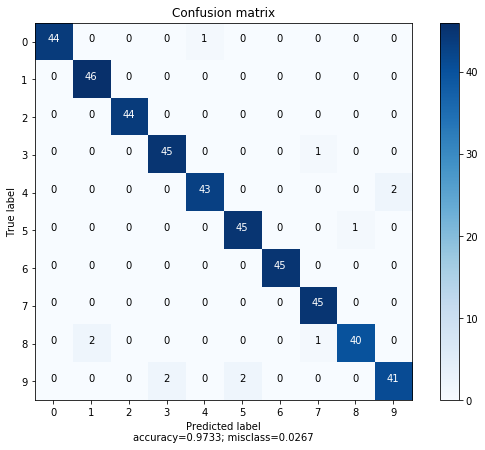

In [24]:
con_mat = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm=con_mat,
                      target_names=np.unique(digits.target),
                      normalize=False)

In [23]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=0)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()